In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# **Análise Inicial do Problema**

Observando nosso arquivo inicial "drug200.csv", temos os seguintes parâmetros, que representam colunas nas tabelas:

| Nome na Coluna             | Tipo de Variável             | Variável                                                | Tipo de Dado                                           |
| ---                        | ---                          | ---                                                     | ---                                                    | 
| Age                        | Variável de determinação     | Idade                                                   | int(anos)                                              |
| Sex                        | Variável de determinação     | Sexo                                                    | object (M = 1 ou F = 0)                                        |
| BP                         | Variável de determinação     | Pressão sanguínea                                       | object (1:HIGH; 2:NORMAL; 3:LOW)                       |
| Cholesterol                | Variável de determinação     | Nível de Colesterol                                     | object (1:HIGH; 2:NORMAL; 3:LOW)                              |
| Na_To_K                    | Variável de determinação     | Razão entre a quantidade de sódio e potássio no sangue  | float                                                  |
| Drug                       | Variável alvo                | Representa o tipo do remédio                            | object (3:DrugX; 4:drugy; 0:drugA; 1: drugB; 2: drugC) | 

Variável de determinação são as variáveis que serão utilizadas para fazer a previsão da variável alvo. Determinamos também o tipo de dado teórico que utilizaremos para manipularmos os dados.

# **Importação e checagem dos primeiros dados**:

Temos, inicialmente, 200 amostras de dados que serão analisadas nesse primeiro momento. Vamos importar a base de dados para podermos lê-la nesse notebook.

In [18]:
# "importando" (lendo) tabela para o código
dados_drogas_200 = pd.read_csv('drug200.csv', sep=',' )

Tendo importado a tabela, vamos fazer uma análise geral das suas linhas:

In [19]:
dados_drogas_200.info() #checaremos se os dados estão sendo interpretados da forma correta  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          200 non-null    int64 
 1   Sex          200 non-null    object
 2   BP           200 non-null    object
 3   Cholesterol  200 non-null    object
 4   Na_to_K      200 non-null    object
 5   Drug         200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


Como observado, nossos dados gerados estão na forma correta. Também conseguimos observar a quantidade de linhas de determinada coluna não-nulas. Como nesse primeiro arquivo "drug200" temos 200 linhas (amostras), o número esperado de não-nulos de cada coluna era 200, que de fato está sendo alcançado.

Analisando os dados estatísticos das variáveis numéricas/quantitativas:

In [20]:
dados_drogas_200.describe()

,Age
count,200.000000
mean,44.315000
std,16.544315
min,15.000000
25%,31.000000
50%,45.000000
75%,58.000000
max,74.000000


# Dados Numéricos:

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots (rows=4, cols=1) #cria espaço com 4 linhas
fig.add_trace(go.Box(x=dados_drogas_200['Age'], name = 'Idade'), row=1, col=1) #cria na primeira linha um boxplot sobre a idade dos pacientes
fig.add_trace(go.Box(x=dados_drogas_200['Na_to_K'], name = 'Razão entre Sódio e Potássio'), row=2, col=1)
fig.update_layout(height = 700)
fig.show()

# Análise Exploratória dos primeiros dados:


In [22]:
dados_drogas_200.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Vamos explorar inicialmente a divisão, dentre essas 200 amostras, de todas as variáveis

### Divisão entre homens e mulheres

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Vamos contar a quantidade de vezes que cada classificação de sexo aparece
sex_count = dados_drogas_200['Sex'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=sex_count.index,  # Classificações dos Sexos
    y=sex_count.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de Sexo',
    xaxis=dict(title='Classificação dos Sexos'),
    yaxis=dict(title='Quantidade')
)

# Exibir o gráfico
fig.show()

### Divisão entre as classificação de pressão sanguínea

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Vamos contar a quantidade de vezes que cada classificação de pressão sanguínea aparece
sex_count = dados_drogas_200['BP'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=sex_count.index,  # Classificações dos Sexos
    y=sex_count.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de pressão sanguínea',
    xaxis=dict(title='Classificação de pressão sanguínea'),
    yaxis=dict(title='Quantidade')
)

# Exibir o gráfico
fig.show()

### Divisão entre a classificação do colesterol no sangue 

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Vamos contar a quantidade de vezes que cada classificação de colesterol no sangue aparece
sex_count = dados_drogas_200['Cholesterol'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=sex_count.index,  # Classificações do colesterol no sangue
    y=sex_count.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de colesterol no sangue',
    xaxis=dict(title='Classificação de classificação de colesterol no sangue'),
    yaxis=dict(title='Quantidade')
)

# Exibir o gráfico
fig.show()

### Histograma das Idades:

(array([ 7.,  5., 10., 11.,  5.,  9.,  5.,  7., 11.,  8.,  9., 12.,  4.,
        12., 12.,  6.,  6.,  8.,  8., 11.,  4.,  6., 11.,  3., 10.]),
 array([15.  , 17.36, 19.72, 22.08, 24.44, 26.8 , 29.16, 31.52, 33.88,
        36.24, 38.6 , 40.96, 43.32, 45.68, 48.04, 50.4 , 52.76, 55.12,
        57.48, 59.84, 62.2 , 64.56, 66.92, 69.28, 71.64, 74.  ]),
 <BarContainer object of 25 artists>)

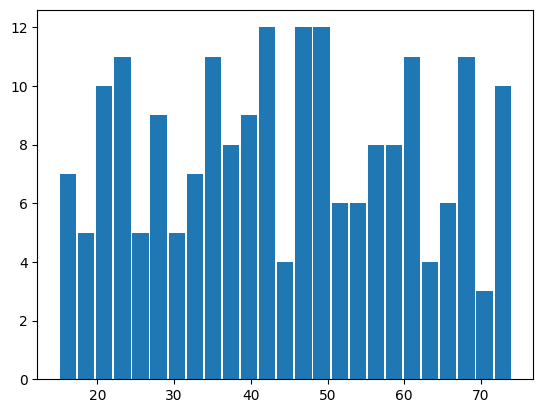

In [26]:
plt.hist(dados_drogas_200['Age'], 25, rwidth=0.9)

### Histograma da razão entre Sódio e Potássio:

(array([8., 8., 8., 8., 8., 8., 8., 8., 7., 8., 8., 8., 8., 8., 9., 8., 7.,
        8., 9., 8., 8., 8., 8., 8., 8.]),
 array([  0.  ,   7.88,  15.76,  23.64,  31.52,  39.4 ,  47.28,  55.16,
         63.04,  70.92,  78.8 ,  86.68,  94.56, 102.44, 110.32, 118.2 ,
        126.08, 133.96, 141.84, 149.72, 157.6 , 165.48, 173.36, 181.24,
        189.12, 197.  ]),
 <BarContainer object of 25 artists>)

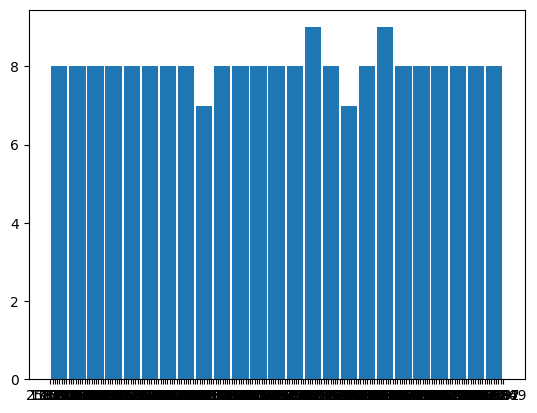

In [27]:
plt.hist(dados_drogas_200['Na_to_K'], 25, rwidth=0.9)

Vamos agora ver características das pessoas para cada droga receitada, de modo a tentar encontrar achar alguma relação entre as drogas e os parâmetros em geral:

# **Análise Exploratória de relações entre variáveis de determinação e variáveis alvo**:

Vamos agora tentar estabelecer algumas relações entre parâmetros classificadores e variáveis alvo (drogas)

### Droga A:

Filtrando os atributos das pessoas para quais foram receitadas a 'drugA':

(array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 0.  ,  0.88,  1.76,  2.64,  3.52,  4.4 ,  5.28,  6.16,  7.04,
         7.92,  8.8 ,  9.68, 10.56, 11.44, 12.32, 13.2 , 14.08, 14.96,
        15.84, 16.72, 17.6 , 18.48, 19.36, 20.24, 21.12, 22.  ]),
 <BarContainer object of 25 artists>)

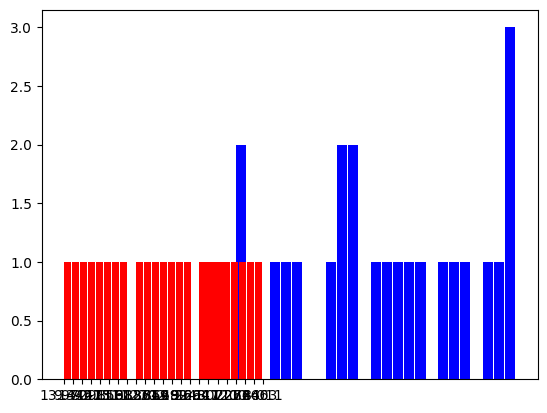

In [28]:
# Filtrando os dados das pessoas que foram receitados a 'drugA'
dados_drugA = dados_drogas_200[dados_drogas_200['Drug'] == 'drugA']

################################################################################
#Filtrando Sexo:
Sex_count_drugA = dados_drugA['Sex'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Sex_count_drugA.index,  # Classificações do sexo 
    y=Sex_count_drugA.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de Sexo nas receitas da DrugA',
    xaxis=dict(title='Classificação do Sexo'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Pressão sanguínea
blood_pressure_count_drugA = dados_drugA['BP'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=blood_pressure_count_drugA.index,  # Classificações da pressão sanguínea
    y=blood_pressure_count_drugA.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações da pressão sanguínea nas receitas da DrugA',
    xaxis=dict(title='Classificação da pressão sanguínea'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Colesterol:
Cholesterol_count_drugA = dados_drugA['Cholesterol'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Cholesterol_count_drugA.index,  # Classificações do colesterol no sangue 
    y=Cholesterol_count_drugA.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações do colesterol no sangue nas receitas da DrugA',
    xaxis=dict(title='Classificação do colesterol no sangue'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Idades:
plt.hist(dados_drugA['Age'], 25, rwidth=0.9, color='Blue')

################################################################################
#Filtrando razão entre sódio e potássio no sangue:
plt.hist(dados_drugA['Na_to_K'], 25, rwidth=0.9, color='Red')

### Droga B:


Filtrando os atributos das pessoas para quais foram receitadas a 'drugB':

(array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 1., 1.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
         6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. , 12.6,
        13.2, 13.8, 14.4, 15. ]),
 <BarContainer object of 25 artists>)

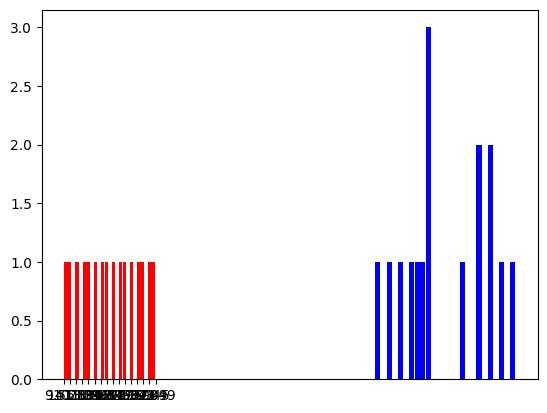

In [29]:
# Filtrando os dados das pessoas que foram receitados a 'drugB'
dados_drugB = dados_drogas_200[dados_drogas_200['Drug'] == 'drugB']

################################################################################
#Filtrando Sexo:
Sex_count_drugB = dados_drugB['Sex'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Sex_count_drugB.index,  # Classificações do sexo 
    y=Sex_count_drugB.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de Sexo nas receitas da DrugB',
    xaxis=dict(title='Classificação do Sexo'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Pressão sanguínea
blood_pressure_count_drugB = dados_drugB['BP'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=blood_pressure_count_drugB.index,  # Classificações da pressão sanguínea
    y=blood_pressure_count_drugB.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações da pressão sanguínea nas receitas da DrugB',
    xaxis=dict(title='Classificação da pressão sanguínea'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Colesterol:
Cholesterol_count_drugB = dados_drugB['Cholesterol'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Cholesterol_count_drugB.index,  # Classificações do colesterol no sangue 
    y=Cholesterol_count_drugB.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações do colesterol no sangue nas receitas da DrugB',
    xaxis=dict(title='Classificação do colesterol no sangue'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Idades:
plt.hist(dados_drugB['Age'], 25, rwidth=0.9, color='Blue')

################################################################################
#Filtrando razão entre sódio e potássio no sangue:
plt.hist(dados_drugB['Na_to_K'], 25, rwidth=0.9, color='Red')

### Droga C:


Filtrando os atributos das pessoas para quais foram receitadas a 'drugC':

(array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 1., 1.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
         6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. , 12.6,
        13.2, 13.8, 14.4, 15. ]),
 <BarContainer object of 25 artists>)

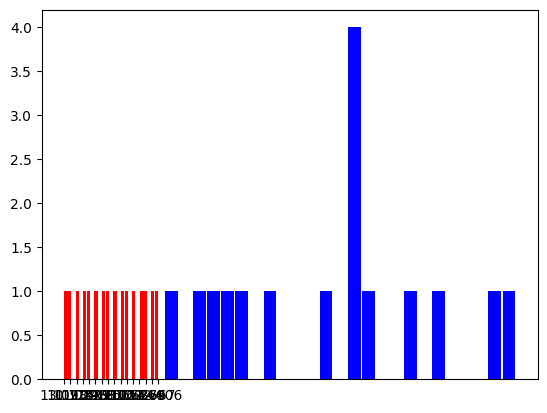

In [30]:
# Filtrando os dados das pessoas que foram receitados a 'drugC'
dados_drugC = dados_drogas_200[dados_drogas_200['Drug'] == 'drugC']

################################################################################
#Filtrando Sexo:
Sex_count_drugC = dados_drugC['Sex'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Sex_count_drugC.index,  # Classificações do sexo 
    y=Sex_count_drugC.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de Sexo nas receitas da drugC',
    xaxis=dict(title='Classificação do Sexo'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Pressão sanguínea
blood_pressure_count_drugC = dados_drugC['BP'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=blood_pressure_count_drugC.index,  # Classificações da pressão sanguínea
    y=blood_pressure_count_drugC.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações da pressão sanguínea nas receitas da drugC',
    xaxis=dict(title='Classificação da pressão sanguínea'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Colesterol:
Cholesterol_count_drugC = dados_drugC['Cholesterol'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Cholesterol_count_drugC.index,  # Classificações do colesterol no sangue 
    y=Cholesterol_count_drugC.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações do colesterol no sangue nas receitas da drugC',
    xaxis=dict(title='Classificação do colesterol no sangue'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Idades:
plt.hist(dados_drugC['Age'], 25, rwidth=0.9, color='Blue')

################################################################################
#Filtrando razão entre sódio e potássio no sangue:
plt.hist(dados_drugC['Na_to_K'], 25, rwidth=0.9, color='Red')

### Droga X:


Filtrando os atributos das pessoas para quais foram receitadas a 'drugX':

(array([3., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3.,
        2., 2., 2., 2., 2., 2., 2., 3.]),
 array([ 0.  ,  2.12,  4.24,  6.36,  8.48, 10.6 , 12.72, 14.84, 16.96,
        19.08, 21.2 , 23.32, 25.44, 27.56, 29.68, 31.8 , 33.92, 36.04,
        38.16, 40.28, 42.4 , 44.52, 46.64, 48.76, 50.88, 53.  ]),
 <BarContainer object of 25 artists>)

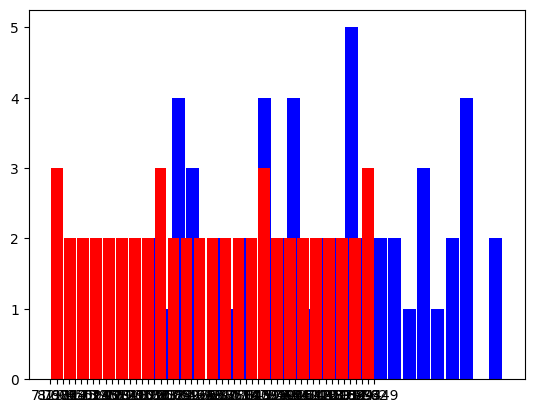

In [31]:
# Filtrando os dados das pessoas que foram receitados a 'drugX'
dados_drugX = dados_drogas_200[dados_drogas_200['Drug'] == 'drugX']

################################################################################
#Filtrando Sexo:
Sex_count_drugX = dados_drugX['Sex'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Sex_count_drugX.index,  # Classificações do sexo 
    y=Sex_count_drugX.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de Sexo nas receitas da drugX',
    xaxis=dict(title='Classificação do Sexo'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Pressão sanguínea
blood_pressure_count_drugX = dados_drugX['BP'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=blood_pressure_count_drugX.index,  # Classificações da pressão sanguínea
    y=blood_pressure_count_drugX.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações da pressão sanguínea nas receitas da drugX',
    xaxis=dict(title='Classificação da pressão sanguínea'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Colesterol:
Cholesterol_count_drugX = dados_drugX['Cholesterol'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Cholesterol_count_drugX.index,  # Classificações do colesterol no sangue 
    y=Cholesterol_count_drugX.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações do colesterol no sangue nas receitas da drugX',
    xaxis=dict(title='Classificação do colesterol no sangue'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Idades:
plt.hist(dados_drugX['Age'], 25, rwidth=0.9, color='Blue')

################################################################################
#Filtrando razão entre sódio e potássio no sangue:
plt.hist(dados_drugX['Na_to_K'], 25, rwidth=0.9, color='Red')

### Droga Y:

Filtrando os atributos das pessoas para quais foram receitadas a 'drugY':

(array([4., 4., 3., 4., 3., 4., 3., 4., 4., 3., 4., 3., 4., 3., 4., 4., 4.,
        4., 3., 4., 3., 4., 3., 4., 4.]),
 array([ 0.  ,  3.56,  7.12, 10.68, 14.24, 17.8 , 21.36, 24.92, 28.48,
        32.04, 35.6 , 39.16, 42.72, 46.28, 49.84, 53.4 , 56.96, 60.52,
        64.08, 67.64, 71.2 , 74.76, 78.32, 81.88, 85.44, 89.  ]),
 <BarContainer object of 25 artists>)

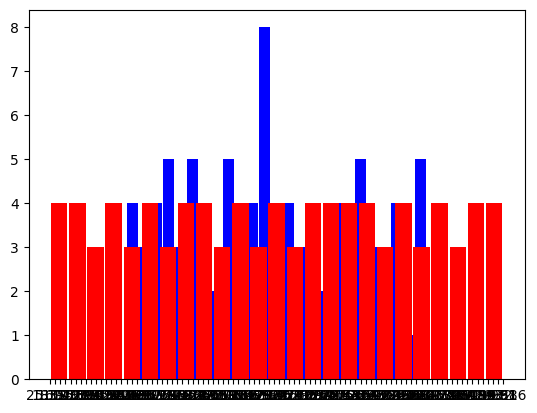

In [32]:
# Filtrando os dados das pessoas que foram receitados a 'DrugY'
dados_DrugY = dados_drogas_200[dados_drogas_200['Drug'] == 'DrugY']

################################################################################
#Filtrando Sexo:
Sex_count_DrugY = dados_DrugY['Sex'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Sex_count_DrugY.index,  # Classificações do sexo 
    y=Sex_count_DrugY.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações de Sexo nas receitas da DrugY',
    xaxis=dict(title='Classificação do Sexo'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Pressão sanguínea
blood_pressure_count_DrugY = dados_DrugY['BP'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=blood_pressure_count_DrugY.index,  # Classificações da pressão sanguínea
    y=blood_pressure_count_DrugY.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações da pressão sanguínea nas receitas da DrugY',
    xaxis=dict(title='Classificação da pressão sanguínea'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Colesterol:
Cholesterol_count_DrugY = dados_DrugY['Cholesterol'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=Cholesterol_count_DrugY.index,  # Classificações do colesterol no sangue 
    y=Cholesterol_count_DrugY.values,  # Contagens
)])

fig.update_layout(
    template='plotly_dark',
    title='Contagem de Classificações do colesterol no sangue nas receitas da DrugY',
    xaxis=dict(title='Classificação do colesterol no sangue'),
    yaxis=dict(title='Quantidade')
)
# Exibir o gráfico
fig.show()

################################################################################
#Filtrando Idades:
plt.hist(dados_DrugY['Age'], 25, rwidth=0.9, color='Blue')

################################################################################
#Filtrando razão entre sódio e potássio no sangue:
plt.hist(dados_DrugY['Na_to_K'], 25, rwidth=0.9, color='Red')


# **Conclusão Inicial**:

Como observado, observamos uma relação clara entre as variáveis de determinação e as variáveis alvo:


Tanto a droga x e y corrigem taxas altas de potássio e sódio no sangue.
A droga c corrige taxas de baixa pressão no sangue juntamente com taxas de colesterol alta.
A droga a e b corrigem taxas de alta pressão no sangue, mas pessoas acima de 50 anos tomam a droga A e pessoas abaixo de 50 anos tomam a droga B. Não conseguimos achar relação entre colesterol nessas duas drogas.

# **Expansão de Dados**:

Dessa maneira, vamos usar essas observações para aumentar o nosso grupo amostral, de modo a preservar dados estatísticos, usando as relações que encontramos acima. Com essa expansão, conseguiremos usar algoritmos de previsão num espaço maior, para fazê-los de fato funcionar. No nosso arquivo "DataExpansion.py", aumentaremos nosso espaço amostral de 200 amostras para cerca de 10000. Essa expansão nos ajudará a aplicar de forma mais eficiente o teorema de Bayes.

# **Relatório de Classificação**

O classification report é uma das principais métricas para avaliar a performance de um modelo de classificação. Ele é uma tabela que apresenta várias métricas de avaliação, tais como acurácia (accuracy), precisão (precision), recall (revocação) e F1-score para cada classe.

O classification report é gerado pelo Scikit-learn (sklearn) e é calculado a partir da matriz de confusão. Ele apresenta informações sobre como o modelo está performando em cada classe, permitindo uma análise mais detalhada da performance do modelo em relação a cada classe.

O formato do classification report é o seguinte:


```
               precision    recall  f1-score   support

  classe 1     0.80      0.90      0.85       100
  classe 2     0.75      0.60      0.67        50
  classe 3     0.70      0.75      0.72        75

    micro avg  0.77      0.77      0.77       225
    macro avg  0.75      0.75      0.74       225
 weighted avg  0.77      0.77      0.76       225

```
Na tabela acima, temos as métricas de precisão (precision), recall (revocação) e F1-score para cada classe. Além disso, temos a quantidade de instâncias em cada classe (support), o valor da acurácia para todas as classes (micro avg), a média ponderada das métricas para todas as classes (weighted avg) e a média aritmética das métricas para todas as classes (macro avg).

A precisão (precision) mede a proporção de instâncias classificadas como positivas que realmente são positivas. Já o recall (revocação) mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. O F1-score é uma média harmônica entre a precisão e o recall e é uma medida de equilíbrio entre essas duas métricas.

O classification report é uma ferramenta importante para avaliar a performance do modelo em cada classe, permitindo uma análise mais detalhada da performance do modelo em relação a cada classe. Ele é especialmente útil quando há um desbalanceamento entre as classes, ou quando uma classe é mais importante do que as outras em um problema de classificação.

# **Matriz de confusão**



A matriz de confusão é uma tabela usada para avaliar a performance de um modelo de classificação. Ela mostra a frequência com que as classes do modelo foram previstas corretamente e incorretamente.

A matriz de confusão tem quatro elementos principais:

Verdadeiro Positivo (VP): quando uma instância pertence à classe positiva e é corretamente classificada pelo modelo como positiva.
Falso Positivo (FP): quando uma instância pertence à classe negativa, mas é incorretamente classificada pelo modelo como positiva.
Verdadeiro Negativo (VN): quando uma instância pertence à classe negativa e é corretamente classificada pelo modelo como negativa.
Falso Negativo (FN): quando uma instância pertence à classe positiva, mas é incorretamente classificada pelo modelo como negativa.
A matriz de confusão é uma tabela 2x2 que coloca os resultados do modelo em relação à classe real. A tabela é organizada da seguinte forma:
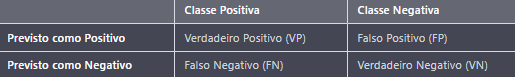

Com base nos valores de VP, FP, FN e VN, podemos calcular várias métricas de avaliação, como a acurácia (accuracy), a precisão (precision), o recall (revocação), o F1-score e a área sob a curva ROC (AUC-ROC). Essas métricas nos ajudam a entender quão bem o modelo está classificando as instâncias em cada classe.

Em geral, uma boa performance do modelo é quando temos valores altos de VP e VN, e baixos valores de FP e FN. Já uma performance ruim do modelo é quando temos valores altos de FP e FN, e baixos valores de VP e VN. A análise da matriz de confusão é uma ferramenta importante para entendermos como o nosso modelo está se comportando na tarefa de classificação.

In [ ]:
#Bagunça cada variável do estudo uma a uma e estima qual a queda de perfomance devido a isso.
#A variável que gerar maior queda é a mais importante para realizar a previsão 
from sklearn.inspection import permutation_importance
resultado = permutation_importance(modelo_ml, x_test, y_test, n_repeats=10, n_jobs=2)
